In [116]:
%%writefile readme.txt
1. Melbourne house pricing project 

Writing readme.txt


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("cleaned_melbourn_housing_data.csv")

In [25]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


# EDA

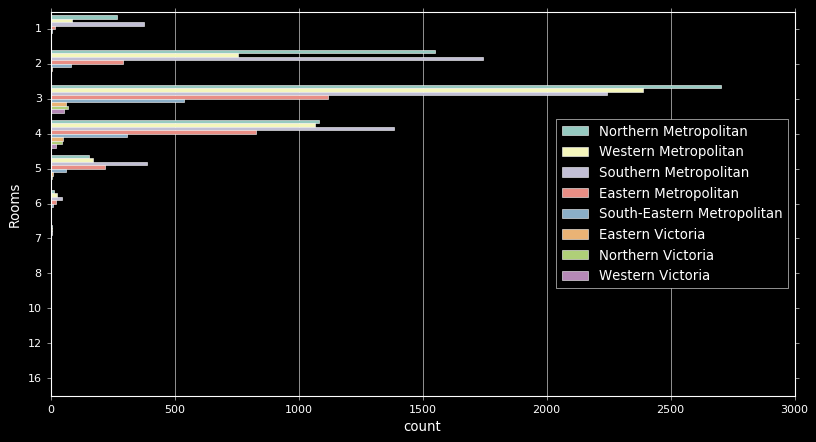

In [26]:
plt.style.use("dark_background")
plt.figure(figsize=(12,6))
sns.countplot(y=df["Rooms"],hue=df["Regionname"])
plt.legend(loc="right")

In [27]:
pd.crosstab(index=df["Rooms"],columns=df["Regionname"]) #counting the rooms according to the region name 

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
Rooms,,,,,,,,
1,16,1,269,0,6,375,87,0
2,292,4,1550,3,84,1743,755,3
3,1117,62,2702,70,538,2245,2388,55
4,829,52,1084,47,307,1384,1065,21
5,219,8,153,4,63,389,171,2
6,22,0,13,2,8,47,24,0
7,2,0,4,0,1,7,4,0
8,2,1,3,0,0,3,2,0
10,0,0,1,0,0,1,0,0


In [28]:
df.groupby(["Regionname","Rooms"])["Price"].mean().unstack() #price according to region name and rooms

Rooms,1,2,3,4,5,6,7,8,10,12,16
Regionname,,,,,,,,,,,
Eastern Metropolitan,560000.000000,748807.880137,1.039901e+06,1.283181e+06,1.540284e+06,1.765432e+06,2.327500e+06,9.600000e+05,NaN,NaN,5000000.0
Eastern Victoria,462000.000000,514000.000000,6.526532e+05,7.317112e+05,1.001625e+06,NaN,NaN,9.100000e+05,NaN,NaN,NaN
Northern Metropolitan,434937.174721,780199.443871,9.213642e+05,1.061438e+06,1.213176e+06,1.168654e+06,1.050375e+06,1.294417e+06,900000.0,NaN,NaN
Northern Victoria,NaN,528166.666667,5.333286e+05,6.514149e+05,7.112500e+05,8.100000e+05,NaN,NaN,NaN,NaN,NaN
South-Eastern Metropolitan,406958.333333,638476.190476,8.552562e+05,1.027895e+06,1.103932e+06,1.376000e+06,1.215000e+06,NaN,NaN,NaN,NaN
Southern Metropolitan,440729.069333,863147.531268,1.502589e+06,2.076764e+06,2.661112e+06,2.658787e+06,2.542429e+06,2.343333e+06,2315000.0,NaN,NaN
Western Metropolitan,391157.471264,678865.356291,8.381158e+05,1.027042e+06,1.309499e+06,1.333000e+06,1.270000e+06,1.143000e+06,NaN,NaN,NaN
Western Victoria,NaN,403833.333333,4.311500e+05,4.342619e+05,5.850000e+05,NaN,NaN,NaN,NaN,710000.0,NaN


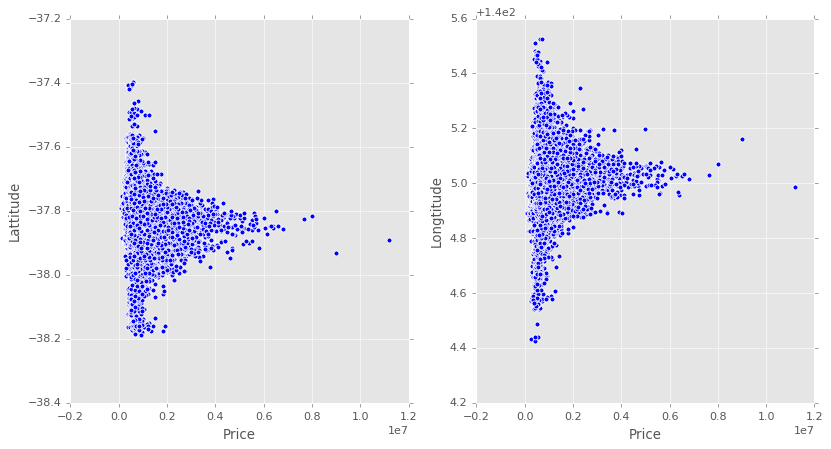

In [29]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=df["Price"],y=df["Lattitude"])
plt.subplot(1,2,2)
sns.scatterplot(x="Price",y="Longtitude",data=df)

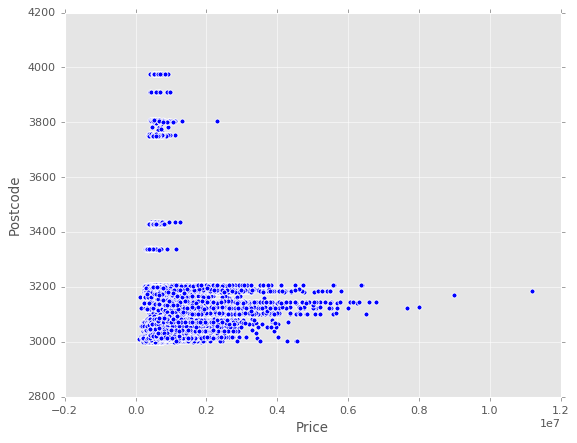

In [30]:
sns.scatterplot(x=df["Price"],y=df["Postcode"],palette="rainbow") #scattered data , drop this column

In [31]:
df.drop(labels="Postcode",axis=1,inplace=True) 

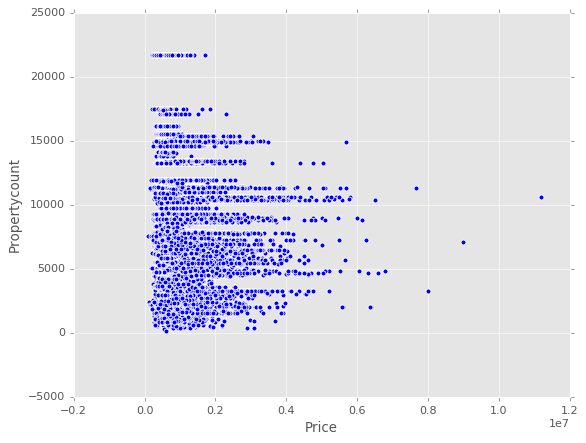

In [32]:
sns.scatterplot(x=df["Price"],y=df["Propertycount"],palette="Set1") #drop prpertycount column

In [33]:
df.drop(labels="Propertycount",axis=1,inplace=True)

In [34]:
df.Address.value_counts().__len__() #19946 unique adress, drop this column

19946

In [35]:
df.drop(labels="Address",axis=1,inplace=True)

In [36]:
df.Suburb.value_counts().__len__() #327 unique value i.e. 327 unique suburb, encode this using label encoder

327

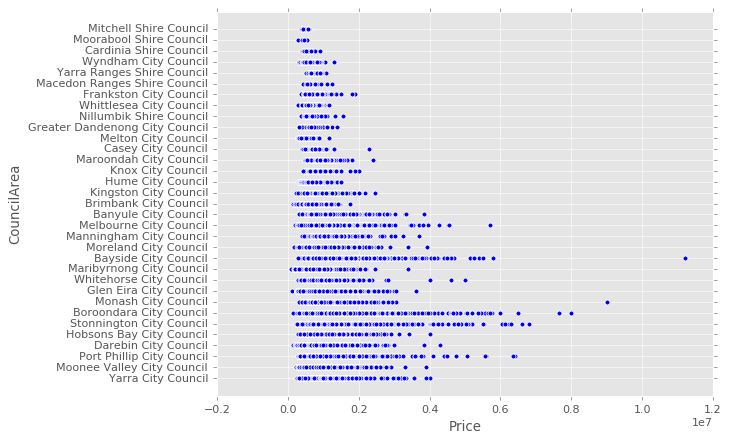

In [37]:
sns.scatterplot(x="Price",y="CouncilArea",data=df)

In [38]:
df.drop(labels="CouncilArea",axis=1,inplace=True)

In [39]:
df.SellerG.value_counts().__len__()

322

In [40]:
df.drop(labels="SellerG",axis=1,inplace=True)

In [41]:
df.drop(labels="Date",axis=1,inplace=True)

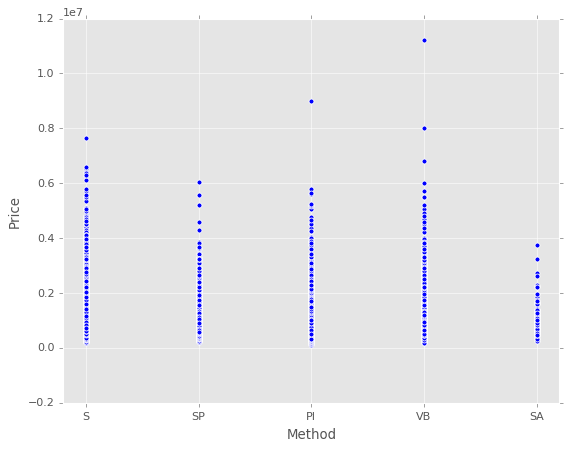

In [42]:
sns.scatterplot(x="Method",y="Price",data=df)

In [43]:
df.drop(labels="Method",axis=1,inplace=True)

In [44]:
df.Type.value_counts()  #use label ecoder

h    15331
u     3420
t     1561
Name: Type, dtype: int64

In [45]:
df.Regionname.value_counts() #use label encoder

Southern Metropolitan         6194
Northern Metropolitan         5779
Western Metropolitan          4496
Eastern Metropolitan          2500
South-Eastern Metropolitan    1007
Eastern Victoria               128
Northern Victoria              126
Western Victoria                82
Name: Regionname, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder 

In [47]:
label_encoder_suburb = LabelEncoder()
df["Suburb"] = label_encoder_suburb.fit_transform(df["Suburb"])

In [48]:
label_encoder_type = LabelEncoder()
df["Type"] = label_encoder_type.fit_transform(df["Type"])

In [49]:
label_encoder_region = LabelEncoder()
df["Regionname"] = label_encoder_region.fit_transform(df["Regionname"])

In [50]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname
0,0,2,0,1480000,2.5,1,1,202.0,-37.7996,144.9984,2
1,0,2,0,1035000,2.5,1,0,156.0,-37.8079,144.9934,2
2,0,3,0,1465000,2.5,2,0,134.0,-37.8093,144.9944,2
3,0,3,0,850000,2.5,2,1,94.0,-37.7969,144.9969,2
4,0,4,0,1600000,2.5,1,2,120.0,-37.8072,144.9941,2


In [51]:
target = df["Price"]

In [52]:
feature = df

In [53]:
df.drop(labels="Price",axis=1,inplace=True)

# splitting the data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=.20,random_state=1000)

# Machine  Learning 

#  Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
lr.score(x_test,y_test)

0.5600519413896847

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error

In [85]:
pred = lr.predict(x_test)

In [86]:
mean_absolute_error(pred,y_test)

287478.10073784494

In [88]:
mean_squared_error(pred,y_test)

183707031539.36517

# Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr = RandomForestRegressor(n_estimators=30,n_jobs=10)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.8196304984500431

In [91]:
pred = rfr.predict(x_test)

In [92]:
mean_absolute_error(pred,y_test)

164090.85159398208

In [93]:
mean_squared_error(pred,y_test)

75316040294.94539

# Support Vector Machine

In [94]:
from sklearn.svm import SVC

In [95]:
model = SVC()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [96]:
model.score(x_train,y_train)

0.6021909040556342

In [100]:
pred = model.predict(x_test)

In [101]:
mean_squared_error(pred,y_test)


351130858119.3143

In [102]:
mean_absolute_error(pred,y_test)

378627.18877676595

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
grid = GridSearchCV?

In [111]:
grid = GridSearchCV(rfr,{"n_estimators":[1,2,3,4,5,62,40,3],"n_jobs":[2,4,10,1]})

In [112]:
grid.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=10,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 62, 40, 3], 'n_jobs': [2, 4, 10, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
pred = grid.predict(x_test)

In [114]:
grid.score(x_test,y_test)

0.821453704477163